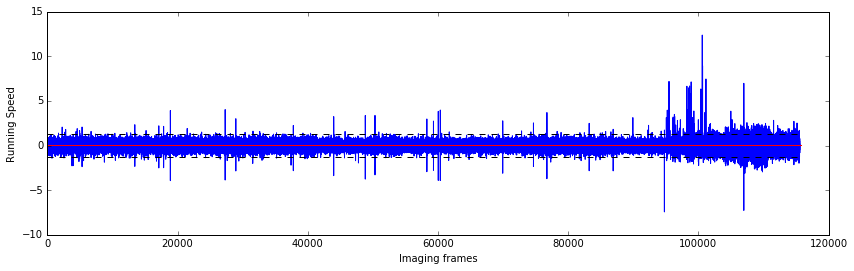

In [7]:
drive_path = '/Volumes/Brain2016' #set the location of your files
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
manifest_path = os.path.join(drive_path,'BrainObservatory','manifest.json')
boc = BrainObservatoryCache(manifest_file=manifest_path)
ophys_dataframe = pd.DataFrame(boc.get_ophys_experiments())

#pick sessions, let's say only ones from session A
session_a = ophys_dataframe[ophys_dataframe.session_type=='three_session_A']
session_id = session_a.id.values[0] #take the fourth session
data_set = boc.get_ophys_experiment_data(ophys_experiment_id = session_id)

#let's look at running speed
run_vals, run_dt = data_set.get_running_speed()
# print(run_vals.shape)
# print(run_dt.shape)
run_mean = np.nanmean(run_vals)
run_3sd = np.nanstd(run_vals)*3

#plot runnind speed with mean and 3*standard deviation
fig, ax = plt.subplots(1,figsize=(14,4))
plt.plot(run_vals)
plt.plot([0, len(run_vals)],[run_mean, run_mean],color='r',linestyle='-')
plt.plot([0, len(run_vals)],[run_mean+run_3sd, run_mean+run_3sd],color='k',linestyle='--')
plt.plot([0, len(run_vals)],[run_mean-run_3sd, run_mean-run_3sd],color='k',linestyle='--')
# for i in range(len(stim_table)):
#     ax.axvspan(xmin=stim_table.start[i],xmax=stim_table.end[i],color='g',alpha=0.2)
plt.xlabel("Imaging frames")
plt.ylabel("Running Speed")
plt.savefig('running_data.png')